In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
df = pd.read_csv("D:\ozgur\Hafta15\Veri.csv")

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\local-admin\AppData\Local\Temp\ipykernel_7432\590988538.py:1: SyntaxWarning: invalid escape sequence '\o'
  df = pd.read_csv("D:\ozgur\Hafta15\Veri.csv")


In [15]:
df.head()

,MusteriID,Cinsiyet,Yas,AbonelikSuresi_Ay,AylikUcret,TeknikDestekAramalari,KullanilanServisler,SonAktiviteTarihi,Churn_Durumu,ToplamHarcananTutar
0,M-1000,Kadın,54.0,50,31.7,9,"Mobil,TV,Telefon",2024-09-29,Evet,1585.0
1,M-1001,Kadın,20.0,12,111.35,5,"Internet,Mobil",2024-11-28,Hayır,1336.2
2,M-1002,Erkek,67.0,33,113.99,5,Mobil,2025-02-01,Hayır,3761.67
3,M-1003,K,64.0,2,79.1,6,"Internet,Mobil",2024-08-24,Hayır,
4,M-1004,Kadın,59.0,53,88.53,8,"Mobil,Internet",2025-04-09,Hayır,4692.09


In [14]:
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   MusteriID              100000 non-null  object 
 1   Cinsiyet               95938 non-null   object 
 2   Yas                    95000 non-null   float64
 3   AbonelikSuresi_Ay      100000 non-null  int64  
 4   AylikUcret             95000 non-null   object 
 5   TeknikDestekAramalari  100000 non-null  int64  
 6   KullanilanServisler    100000 non-null  object 
 7   SonAktiviteTarihi      100000 non-null  object 
 8   Churn_Durumu           100000 non-null  object 
 9   ToplamHarcananTutar    92289 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


MusteriID                   0
Cinsiyet                 4062
Yas                      5000
AbonelikSuresi_Ay           0
AylikUcret               5000
TeknikDestekAramalari       0
KullanilanServisler         0
SonAktiviteTarihi           0
Churn_Durumu                0
ToplamHarcananTutar      7711
dtype: int64

🔢 SMOTE sonrası sınıf dağılımı:
Churn_Durumu
0    54642
1    54642
Name: count, dtype: int64


C:\Users\Muhammed\AppData\Local\Temp\ipykernel_10760\2730720264.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["AylikUcret"].fillna(df["AylikUcret"].mean(), inplace=True)
C:\Users\Muhammed\AppData\Local\Temp\ipykernel_10760\2730720264.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

Accuracy: 0.7489030276437034

Confusion Matrix:
 [[13654     0]
 [ 4578     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     13654
           1       0.00      0.00      0.00      4578

    accuracy                           0.75     18232
   macro avg       0.37      0.50      0.43     18232
weighted avg       0.56      0.75      0.64     18232



c:\Users\Muhammed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Muhammed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Muhammed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

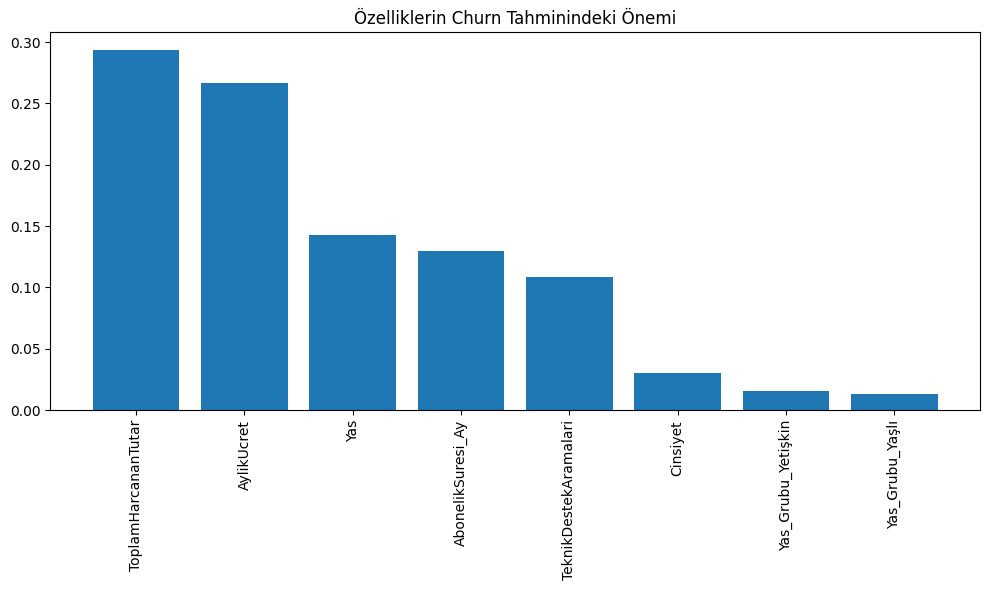

C:\Users\Muhammed\AppData\Local\Temp\ipykernel_10760\2730720264.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_sayilari.index, y=churn_sayilari.values, palette="Set2")


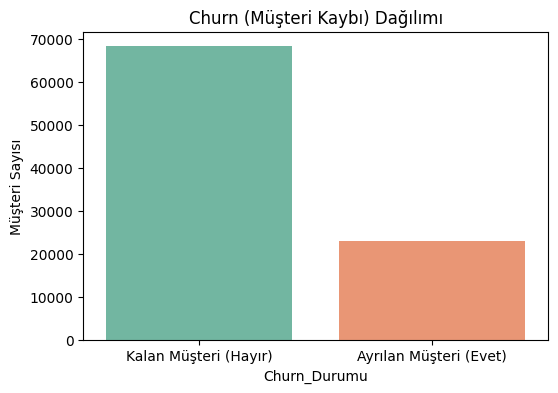

🔢 SMOTE sonrası sınıf dağılımı:
Churn_Durumu
0    54642
1    54642
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#from imblearn.over_sampling import SMOTE

# SMOTE uygulama (sadece eğitim verisinde!)
#sm = SMOTE(random_state=42)
#X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

#print("🔢 SMOTE sonrası sınıf dağılımı:")
#print(pd.Series(y_train_res).value_counts())

# Veri yükle
df = pd.read_csv("Veri.csv")


# Tarih dönüşümü
df["SonAktiviteTarihi"] = pd.to_datetime(df["SonAktiviteTarihi"], errors="coerce")

# Sayısal dönüşümler ve eksik doldurma
df["AylikUcret"] = pd.to_numeric(df["AylikUcret"], errors="coerce")
df["AylikUcret"].fillna(df["AylikUcret"].mean(), inplace=True)

df["ToplamHarcananTutar"] = pd.to_numeric(df["ToplamHarcananTutar"], errors="coerce")
df["ToplamHarcananTutar"].fillna(df["AylikUcret"] * df["AbonelikSuresi_Ay"], inplace=True)

# Kategorik dönüşümler
df["Churn_Durumu"] = df["Churn_Durumu"].map({"Evet": 1, "Hayır": 0})
df["Cinsiyet"] = df["Cinsiyet"].str.lower().map({"erkek": 1, "kadın": 0, "k": 0, "e":1})


# Yaş gruplaması
bins = [18, 30, 60, 100]
labels = ["Genç", "Yetişkin", "Yaşlı"]
df["Yas_Grubu"] = pd.cut(df["Yas"], bins=bins, labels=labels, right=True)
df = pd.get_dummies(df, columns=["Yas_Grubu"], drop_first=True)

df.dropna(inplace=True)


# Özellikler ve hedef değişken
X = df.drop(columns=["MusteriID", "Churn_Durumu", "SonAktiviteTarihi", "KullanilanServisler"], errors="ignore")
y = df["Churn_Durumu"]

# Veri setini eğitim ve test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modeli oluştur (RandomForestClassifier kullanıyoruz)
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Model performansını değerlendir
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Özellik önemlerini al ve sıralar
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Özellik önemlerini grafikle göster
plt.figure(figsize=(10,6))
plt.title("Özelliklerin Churn Tahminindeki Önemi")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# Churn dağılımını göster
churn_sayilari = df["Churn_Durumu"].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=churn_sayilari.index, y=churn_sayilari.values, palette="Set2")
plt.xticks([0,1], ["Kalan Müşteri (Hayır)", "Ayrılan Müşteri (Evet)"])
plt.ylabel("Müşteri Sayısı")
plt.title("Churn (Müşteri Kaybı) Dağılımı")
plt.show()
 






In [5]:
df.isna().sum()

MusteriID                0
Cinsiyet                 0
Yas                      0
AbonelikSuresi_Ay        0
AylikUcret               0
TeknikDestekAramalari    0
KullanilanServisler      0
SonAktiviteTarihi        0
Churn_Durumu             0
ToplamHarcananTutar      0
Yas_Grubu_Yetişkin       0
Yas_Grubu_Yaşlı          0
dtype: int64

In [11]:
print(df.info())
print(df.describe())

# Hedef değişken dağılımı
print(df["Churn_Durumu"].value_counts())



<class 'pandas.core.frame.DataFrame'>
Index: 91156 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   MusteriID              91156 non-null  object        
 1   Cinsiyet               91156 non-null  float64       
 2   Yas                    91156 non-null  float64       
 3   AbonelikSuresi_Ay      91156 non-null  int64         
 4   AylikUcret             91156 non-null  float64       
 5   TeknikDestekAramalari  91156 non-null  int64         
 6   KullanilanServisler    91156 non-null  object        
 7   SonAktiviteTarihi      91156 non-null  datetime64[ns]
 8   Churn_Durumu           91156 non-null  int64         
 9   ToplamHarcananTutar    91156 non-null  float64       
 10  Yas_Grubu_Yetişkin     91156 non-null  bool          
 11  Yas_Grubu_Yaşlı        91156 non-null  bool          
dtypes: bool(2), datetime64[ns](1), float64(4), int64(3), object(2)
me

In [ ]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Muhammed\AppData\Local\Temp\ipykernel_10760\2452710209.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["AylikUcret"].fillna(df["AylikUcret"].mean(), inplace=True)
C:\Users\Muhammed\AppData\Local\Temp\ipykernel_10760\2452710209.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

✅ Accuracy: 0.7083698990785432
📊 Confusion Matrix:
 [[12572  1082]
 [ 4235   343]]
🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.92      0.83     13654
           1       0.24      0.07      0.11      4578

    accuracy                           0.71     18232
   macro avg       0.49      0.50      0.47     18232
weighted avg       0.62      0.71      0.65     18232



C:\Users\Muhammed\AppData\Local\Temp\ipykernel_10760\2452710209.py:65: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Muhammed\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


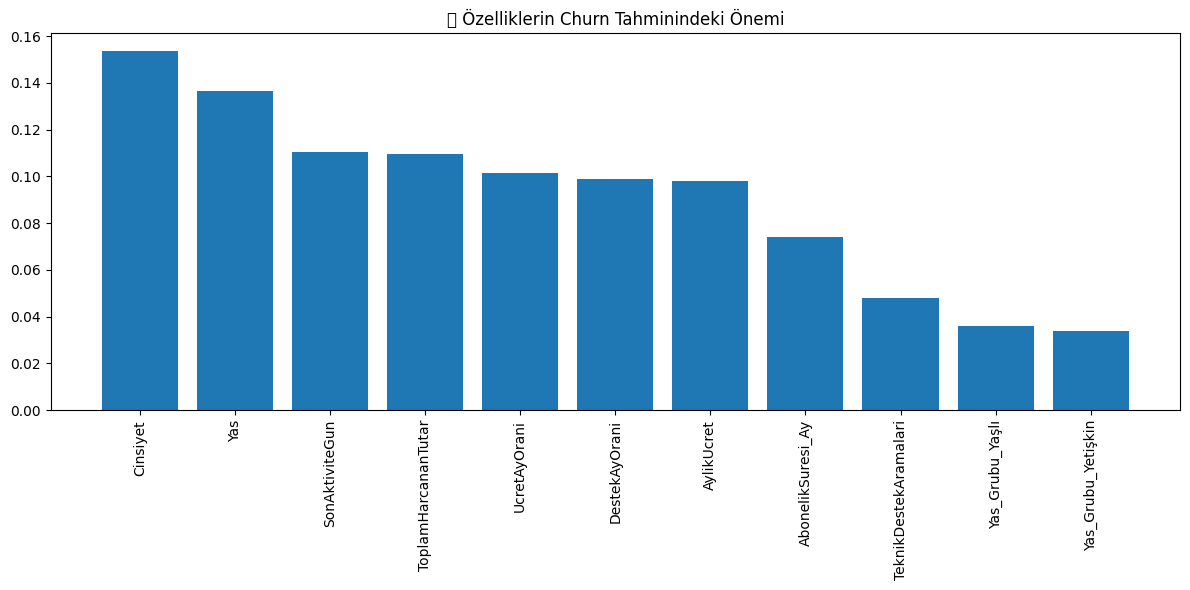

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# 🔹 1. Veri Yükleme
df = pd.read_csv("Veri.csv")

# 🔹 2. Ön İşleme
df["SonAktiviteTarihi"] = pd.to_datetime(df["SonAktiviteTarihi"], errors="coerce")

# Sayısal dönüşümler ve eksik doldurma
df["AylikUcret"] = pd.to_numeric(df["AylikUcret"], errors="coerce")
df["AylikUcret"].fillna(df["AylikUcret"].mean(), inplace=True)

df["ToplamHarcananTutar"] = pd.to_numeric(df["ToplamHarcananTutar"], errors="coerce")
df["ToplamHarcananTutar"].fillna(df["AylikUcret"] * df["AbonelikSuresi_Ay"], inplace=True)

# Kategorik dönüşümler
df["Churn_Durumu"] = df["Churn_Durumu"].map({"Evet": 1, "Hayır": 0})
df["Cinsiyet"] = df["Cinsiyet"].astype(str).str.lower().map({"erkek": 1, "kadın": 0, "e": 1, "k": 0})
df.dropna(inplace=True)

# 🔹 3. Özellik Mühendisliği
df["SonAktiviteGun"] = (pd.to_datetime("2025-08-01") - df["SonAktiviteTarihi"]).dt.days
df["UcretAyOrani"] = df["ToplamHarcananTutar"] / (df["AbonelikSuresi_Ay"] + 1)
df["DestekAyOrani"] = df["TeknikDestekAramalari"] / (df["AbonelikSuresi_Ay"] + 1)

# Yaş grubu
bins = [0, 30, 60, 120]
labels = ["Genç", "Yetişkin", "Yaşlı"]
df["Yas_Grubu"] = pd.cut(df["Yas"], bins=bins, labels=labels)
df = pd.get_dummies(df, columns=["Yas_Grubu"], drop_first=True)

# 🔹 4. Model için veri ayır
X = df.drop(columns=["MusteriID", "Churn_Durumu", "SonAktiviteTarihi", "KullanilanServisler"], errors="ignore")
y = df["Churn_Durumu"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 5. SMOTE ile sınıf dengesi
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# 🔹 6. Model oluşturma ve eğitme
model = RandomForestClassifier(n_estimators=200, max_depth=None, class_weight="balanced", random_state=42)
model.fit(X_train_res, y_train_res)

# 🔹 7. Tahmin ve Değerlendirme
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("🧾 Classification Report:\n", classification_report(y_test, y_pred))

# 🔹 8. Özellik Önem Grafiği
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("🎯 Özelliklerin Churn Tahminindeki Önemi")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


C:\Users\Muhammed\AppData\Local\Temp\ipykernel_10760\3650089312.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["AylikUcret"].fillna(df["AylikUcret"].mean(), inplace=True)
C:\Users\Muhammed\AppData\Local\Temp\ipykernel_10760\3650089312.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

🔍 Doğruluk (Accuracy): 0.4995

📊 Confusion Matrix:
 [[7540 7464]
 [2546 2450]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.50      0.60     15004
           1       0.25      0.49      0.33      4996

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.46     20000
weighted avg       0.62      0.50      0.53     20000



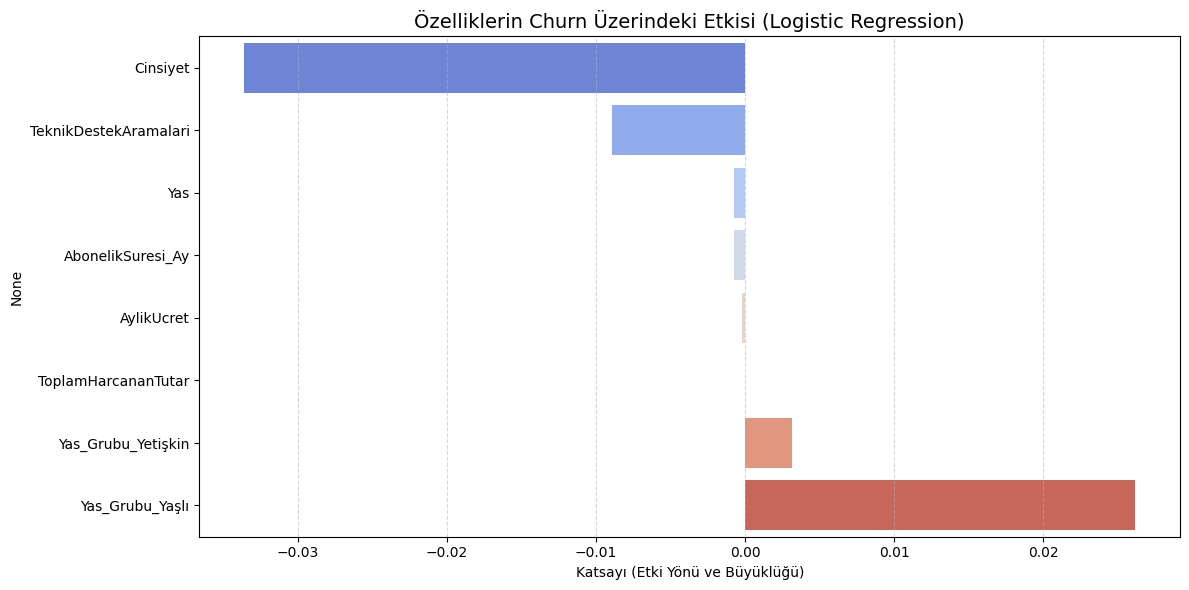

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer

# 🔹 Veriyi yükle
df = pd.read_csv("Veri.csv")

# 🔹 Tarih sütununu datetime'a çevir
df["SonAktiviteTarihi"] = pd.to_datetime(df["SonAktiviteTarihi"], errors="coerce")

# 🔹 Sayısal sütunları dönüştür ve eksikleri doldur
df["AylikUcret"] = pd.to_numeric(df["AylikUcret"], errors="coerce")
df["AylikUcret"].fillna(df["AylikUcret"].mean(), inplace=True)

df["ToplamHarcananTutar"] = pd.to_numeric(df["ToplamHarcananTutar"], errors="coerce")
df["ToplamHarcananTutar"].fillna(df["AylikUcret"] * df["AbonelikSuresi_Ay"], inplace=True)

# 🔹 Kategorik değişkenleri dönüştür
df["Churn_Durumu"] = df["Churn_Durumu"].map({"Evet": 1, "Hayır": 0})
df["Cinsiyet"] = df["Cinsiyet"].str.lower().map({"erkek": 1, "kadın": 0, "k": 0})

# 🔹 Yaş grubu oluştur ve one-hot encoding uygula
bins = [0, 30, 60, 120]
labels = ["Genç", "Yetişkin", "Yaşlı"]
df["Yas_Grubu"] = pd.cut(df["Yas"], bins=bins, labels=labels)
df = pd.get_dummies(df, columns=["Yas_Grubu"], drop_first=True)

# 🔹 Özellikler ve hedef
X = df.drop(columns=["MusteriID", "Churn_Durumu", "SonAktiviteTarihi", "KullanilanServisler"], errors="ignore")
y = df["Churn_Durumu"]

# 🔹 Sayısal ve kategorik sütunları belirle
numerik_sutunlar = X.select_dtypes(include=["int", "float"]).columns
kategorik_sutunlar = X.select_dtypes(include=["object", "bool", "category"]).columns

# 🔹 Sayısal eksikleri ortalama ile doldur
num_imputer = SimpleImputer(strategy='mean')
X[numerik_sutunlar] = num_imputer.fit_transform(X[numerik_sutunlar])

# 🔹 Kategorik eksikleri mod (en sık) ile doldurmak için önce object'e çevir
X[kategorik_sutunlar] = X[kategorik_sutunlar].astype("object")
cat_imputer = SimpleImputer(strategy='most_frequent')
X[kategorik_sutunlar] = cat_imputer.fit_transform(X[kategorik_sutunlar])

# 🔹 Eğitim ve test seti
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Lojistik regresyon modeli (dengesiz veri için class_weight='balanced')
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

# 🔹 Tahmin ve performans çıktısı
y_pred = model.predict(X_test)
print("🔍 Doğruluk (Accuracy):", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

# 🔹 Özellik katsayılarını görselleştir
coefficients = pd.Series(model.coef_[0], index=X.columns).sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=coefficients.values, y=coefficients.index, palette="coolwarm")
plt.title("Özelliklerin Churn Üzerindeki Etkisi (Logistic Regression)", fontsize=14)
plt.xlabel("Katsayı (Etki Yönü ve Büyüklüğü)")
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()


C:\Users\Muhammed\AppData\Local\Temp\ipykernel_10760\1516921423.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["AktiviteGunFarki"].fillna(df["AktiviteGunFarki"].median(), inplace=True)


C:\Users\Muhammed\AppData\Local\Temp\ipykernel_10760\2492890852.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["AktiviteGunFarki"].fillna(df["AktiviteGunFarki"].median(), inplace=True)
C:\Users\Muhammed\AppData\Local\Temp\ipykernel_10760\2492890852.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

İşlenmiş veri boyutu: 100000
Churn oranı: 25.11%
SMOTE sonrası boyut: 149784

Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85     14943
           1       1.00      0.64      0.78     15014

    accuracy                           0.82     29957
   macro avg       0.87      0.82      0.82     29957
weighted avg       0.87      0.82      0.82     29957


12 yüksek riskli müşteri kaydedildi


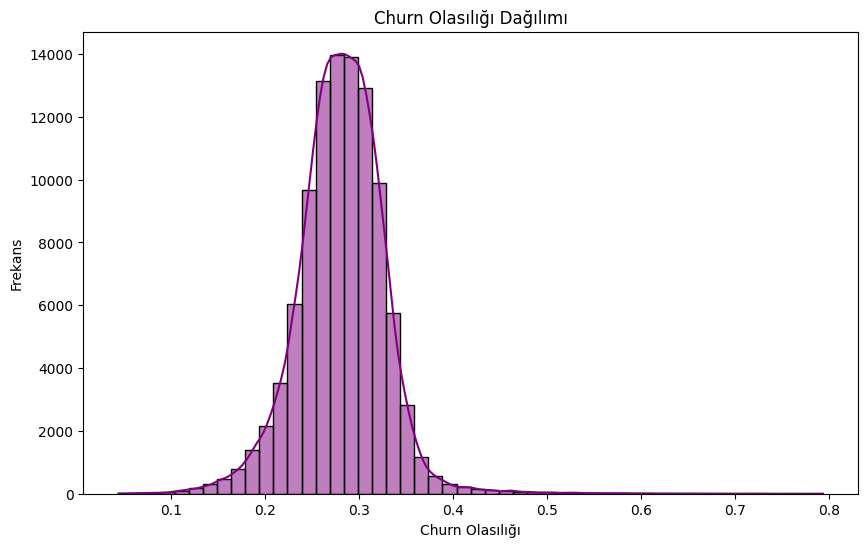

C:\Users\Muhammed\AppData\Local\Temp\ipykernel_10760\2492890852.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn_Durumu', data=df, palette='Set2')


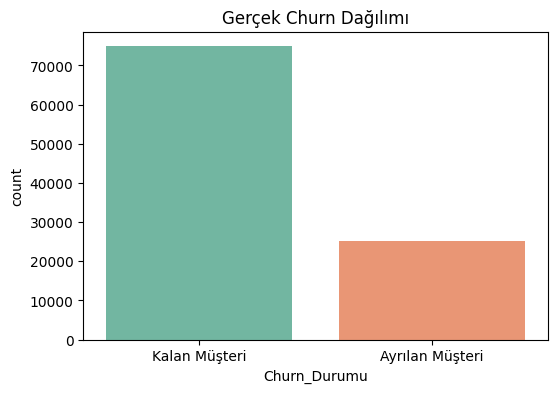

C:\Users\Muhammed\AppData\Local\Temp\ipykernel_10760\2492890852.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Önem', y='Özellik', data=fi_df, palette='viridis')


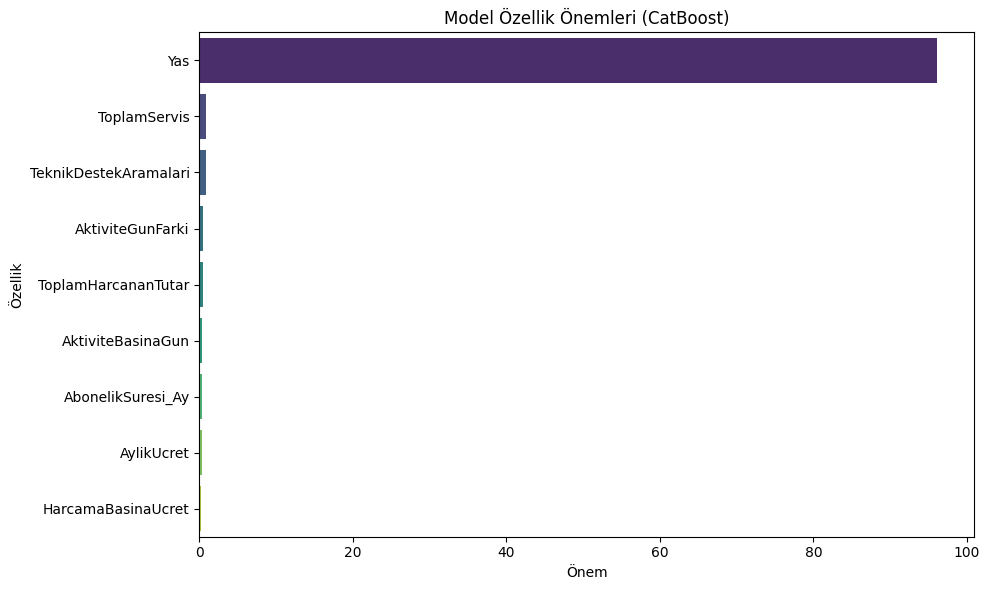

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Veri yükleme ve temizlik
df = pd.read_csv("Veri.csv")

# Para birimi dönüşümü
def clean_currency(value):
    try:
        if isinstance(value, str):
            value = value.replace(' TL', '').replace('tl', '').replace(',', '.').strip()
            if value == '' or value == ' ':
                return np.nan
            return float(value)
        return value
    except:
        return np.nan

df['AylikUcret'] = df['AylikUcret'].apply(clean_currency)
df['ToplamHarcananTutar'] = df['ToplamHarcananTutar'].apply(clean_currency)

# Tarih işlemleri
df["SonAktiviteTarihi"] = pd.to_datetime(df["SonAktiviteTarihi"], errors='coerce')
df["AktiviteGunFarki"] = (pd.Timestamp("2025-08-03") - df["SonAktiviteTarihi"]).dt.days
df["AktiviteGunFarki"].fillna(df["AktiviteGunFarki"].median(), inplace=True)

# Servis sayısı
df["ToplamServis"] = df["KullanilanServisler"].fillna('').apply(
    lambda x: len(str(x).split(',')) if x != '' else 0
)

# Cinsiyet dönüşümü
df["Cinsiyet"] = (
    df["Cinsiyet"]
    .str.lower()
    .str.strip()
    .map({'erkek': 1, 'e': 1, 'kadın': 0, 'k': 0, 'kadin': 0})
    .fillna(-1)
)

# Eksik değerleri doldurma
df['Yas'].fillna(df['Yas'].median(), inplace=True)
df['AylikUcret'].fillna(df['AylikUcret'].median(), inplace=True)
df['ToplamHarcananTutar'].fillna(
    df['AylikUcret'] * df['AbonelikSuresi_Ay'], 
    inplace=True
)

# Yeni özellikler - NaN kontrolü ekledik
df['HarcamaBasinaUcret'] = df['ToplamHarcananTutar'] / (df['AbonelikSuresi_Ay'].replace(0, 1) + 1e-6)
df['AktiviteBasinaGun'] = df['AktiviteGunFarki'] / (df['AbonelikSuresi_Ay'].replace(0, 1) + 1e-6)

# Hedef değişken
df["Churn_Durumu"] = (
    df["Churn_Durumu"]
    .str.strip()
    .map({"Evet": 1, "Hayır": 0, "Evet ": 1, "Hayır ": 0, "evet": 1, "hayır": 0})
)

# Özellik seçimi
features = [
    'Yas', 'AbonelikSuresi_Ay', 'AylikUcret', 
    'TeknikDestekAramalari', 'ToplamHarcananTutar',
    'AktiviteGunFarki', 'ToplamServis',
    'HarcamaBasinaUcret', 'AktiviteBasinaGun'
]

# NaN kontrolü ve temizleme
df = df.dropna(subset=features + ['Churn_Durumu'])
X = df[features]
y = df["Churn_Durumu"]

print(f"İşlenmiş veri boyutu: {len(X)}")
print(f"Churn oranı: {y.mean():.2%}")

# SMOTE uygulama - NaN kontrolü sonrası
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
print(f"SMOTE sonrası boyut: {len(X_res)}")

# Veri bölme
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42
)

# Model eğitimi
model = CatBoostClassifier(
    iterations=800,
    learning_rate=0.05,
    depth=7,
    eval_metric='Recall',
    auto_class_weights='Balanced',
    verbose=0
)
model.fit(X_train, y_train)

# Değerlendirme
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Kritik müşteriler
df['Churn_Olasiligi'] = model.predict_proba(df[features])[:, 1]
high_risk = df[df['Churn_Olasiligi'] > 0.7][['MusteriID', 'Churn_Olasiligi']]
high_risk.to_csv('yuksek_riskli_musteriler.csv', index=False)
print(f"\n{len(high_risk)} yüksek riskli müşteri kaydedildi")


# Churn olasılık dağılımı
plt.figure(figsize=(10,6))
sns.histplot(df['Churn_Olasiligi'], bins=50, kde=True, color='purple')
plt.title('Churn Olasılığı Dağılımı')
plt.xlabel('Churn Olasılığı')
plt.ylabel('Frekans')
plt.show()

# Gerçek Churn dağılımı
plt.figure(figsize=(6,4))
sns.countplot(x='Churn_Durumu', data=df, palette='Set2')
plt.title('Gerçek Churn Dağılımı')
plt.xticks([0, 1], ['Kalan Müşteri', 'Ayrılan Müşteri'])
plt.show()

# Modelin özellik önemleri
feature_importances = model.get_feature_importance()
features = X.columns

fi_df = pd.DataFrame({'Özellik': features, 'Önem': feature_importances}).sort_values(by='Önem', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Önem', y='Özellik', data=fi_df, palette='viridis')
plt.title('Model Özellik Önemleri (CatBoost)')
plt.tight_layout()
plt.show()


MusteriID                    0
Cinsiyet                     0
Yas                          0
AbonelikSuresi_Ay            0
AylikUcret                   0
TeknikDestekAramalari        0
KullanilanServisler          0
SonAktiviteTarihi            0
Churn_Durumu                 0
ToplamHarcananTutar       5000
AktiviteGunFarki             0
ToplamServis                 0
HarcamaBasinaUcret       10503
dtype: int64

In [27]:
# Müşteri segmentasyonu
df['Risk_Segmenti'] = pd.cut(df['Churn_Olasiligi'],
                             bins=[0, 0.4, 0.7, 1],
                             labels=['Düşük Risk', 'Orta Risk', 'Yüksek Risk'])

# Segmentlere göre analiz
segment_analysis = df.groupby('Risk_Segmenti').agg({
    'AylikUcret': 'mean',
    'AbonelikSuresi_Ay': 'median',
    'ToplamServis': 'mean',
    'MusteriID': 'count'
}).rename(columns={'MusteriID': 'MusteriSayisi'})

# Önerilen aksiyonlar
actions = {
    'Yüksek Risk': 'Kişiselleştirilmiş teklif + Müdür araması',
    'Orta Risk': 'E-posta kampanyası + Özel teklif',
    'Düşük Risk': 'Genel sadakat programı'
}

segment_analysis['Önerilen_Aksiyon'] = segment_analysis.index.map(actions)
print(segment_analysis)

               AylikUcret  AbonelikSuresi_Ay  ToplamServis  MusteriSayisi  \
Risk_Segmenti                                                               
Düşük Risk     114.857012               36.0      1.998486          99058   
Orta Risk      121.091161               27.0      1.933333            930   
Yüksek Risk    112.115833               47.0      2.250000             12   

                                        Önerilen_Aksiyon  
Risk_Segmenti                                             
Düşük Risk                        Genel sadakat programı  
Orta Risk               E-posta kampanyası + Özel teklif  
Yüksek Risk    Kişiselleştirilmiş teklif + Müdür araması  


C:\Users\Muhammed\AppData\Local\Temp\ipykernel_10760\2235494979.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = df.groupby('Risk_Segmenti').agg({
